1.1.1 Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки

In [6]:
import numpy as np
x = np.array([0, 1, 2, 3]) 
y = np.array([-1, 0.2, 0.9, 2.1])
#Перепишем линейное уравнение у = mx + с как у = Аp, где А = [[ x 1 ]] и p = [[m], [c]] #Построим А по х :

A = np.vstack([x, np.ones(len(x))]).T 
A

#Используем метод Lstsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


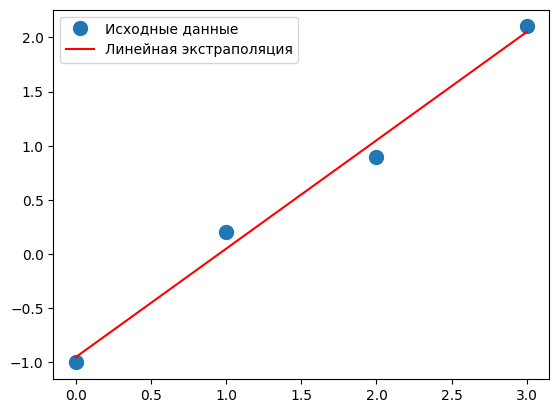

In [8]:
#Построим график полученной прямой и укажем на нем точки. 

import matplotlib.pyplot as plt 
plt.plot(x, y, 'o', label='Исходные данные', markersize=10) 
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция') 
plt. legend()
plt.show()

1.1.2 Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [29]:
from numpy import * 
from numpy.random import * 
#генерируем случайные х и у 

delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5) 
x += delta*(rand(11)-0.5)
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x) 
print(y)

[-5.24605284 -4.12239596 -2.81253711 -1.96307128 -1.49714018 -0.27473622
  0.87113817  1.54075553  2.70544872  4.030486    5.01384087]
[24.79177443 16.42166313  9.44633608  4.49718211  0.61861376  0.12596686
  1.13200473  4.16308613  9.21297628 16.08737078 25.05976246]


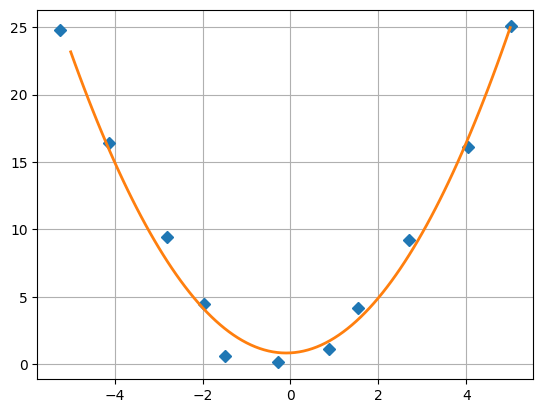

In [30]:
# Нахождение коэффициентов функции вида у = ах 2 + bx + с методом наименьших квадратов # задаем вектор т - [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектара т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2] 
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt. savefig('парабола.png')

1.1.3 По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

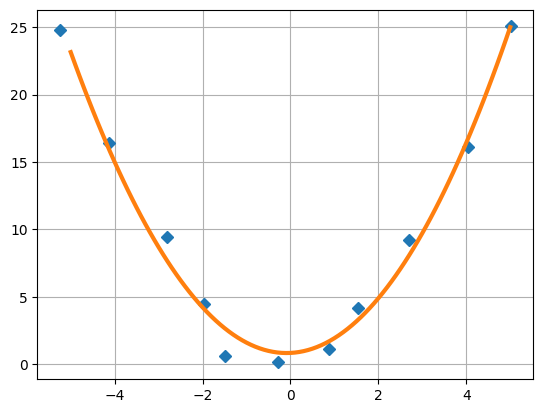

In [38]:
#Решение # Нахождение коэффициентов функции вида у - аx*3 + bx*2 + сх + d методом наименьших квадратов # задаем бектор т = [x**3, x, E] - 
m = vstack((x**3, x**2, x, ones(11))).T 
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую бида у - аx*3 + bx*2 + сx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3] 
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-',lw = 3) 
plt.grid()
plt.savefig("полином 3-й степени.png")

Задание 1
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.


In [41]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем случайные х и у
delta = 1.0
x = linspace(-10,10,20)
y = x**3+delta*(rand(20))
x += delta*(rand(20))
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)



[-9.36449228 -7.99597897 -7.77378677 -6.02045574 -5.72105034 -4.65814208
 -3.41418199 -2.60324034 -0.86290323 -0.36217148  0.89573303  2.23478508
  3.18439459  4.35441945  5.21983315  6.16410064  7.10504381  8.89163496
  9.03453907 10.02026812]
[-9.99153117e+02 -7.15986645e+02 -4.91467613e+02 -3.20271518e+02
 -1.93961152e+02 -1.05572585e+02 -4.99276735e+01 -1.80218635e+01
 -3.68280471e+00 -1.37519379e-01  4.72504938e-01  4.45115985e+00
  1.86181171e+01  5.04364706e+01  1.06995823e+02  1.94098815e+02
  3.20330995e+02  4.92784606e+02  7.17119270e+02  1.00091891e+03]


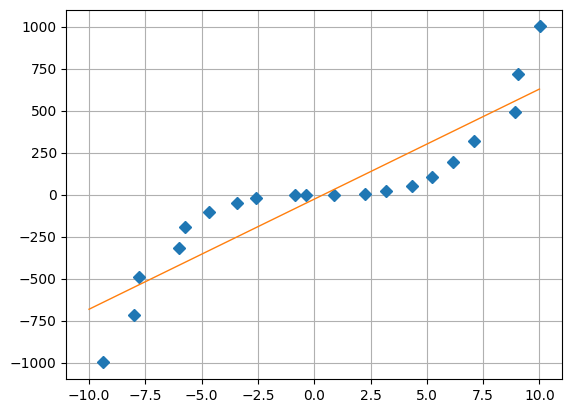

In [42]:
# Нахождение коэффициентов функции вида у = bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()

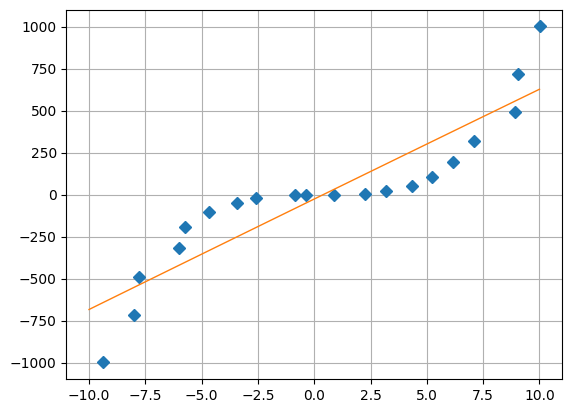

In [43]:
m = vstack((x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10,10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],"-", lw=1)
plt.grid()


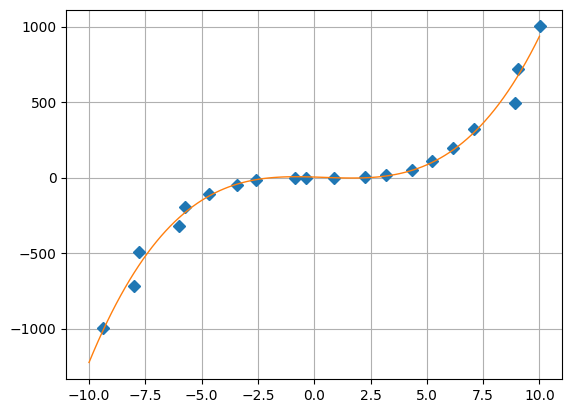

In [44]:
m = vstack((x**3,x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2+x_prec*s[2]+s[3],"-", lw=1)
plt.grid()


1.1.4 Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥
2
)


In [64]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b (0.25, 0.75, 0.5) 
beta = (0.25, 0.75, 0.5) 
def f(x, b0, b1, b2): 
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массиб точек хі
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума) 
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

0.00023489304635600694


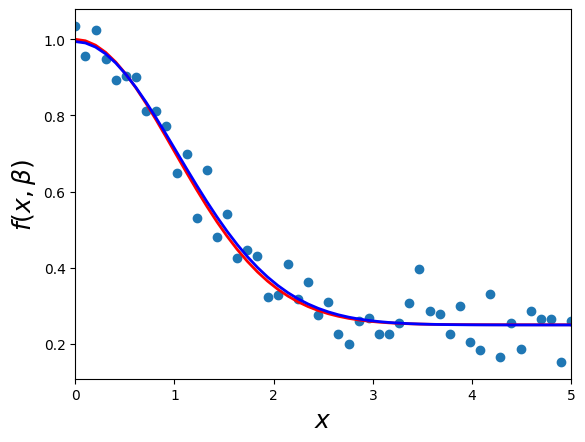

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.03514766 0.95512245 1.02492753 0.94886688 0.89315596 0.90374789
 0.90130144 0.81057067 0.81041446 0.77327149 0.64787734 0.69748739
 0.5293308  0.65625964 0.48054536 0.54183865 0.4265191  0.44678752
 0.43026384 0.32376648 0.32751091 0.41021273 0.31900578 0.36208876
 0.27665181 0.31055975 0.22680964 0.19989036 0.26080658 0.26824888
 0.22539785 0.22462207 0.2538797  0.30807751 0.39576591 0.28619517
 0.27824848 0.22605355 0.300481   0.20

In [66]:
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata 
from scipy.optimize import curve_fit
import scipy as sp
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
beta_opt
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, beta_opt) fres = sum(residuals**2) print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()
print(xdata)
print(ydata)

1.1.5
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥
2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥
𝑏1

In [69]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75) 
import numpy as np

beta = (0.25, 0.75) 
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек xi 
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума) 
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2)
print(fres)

[0.27712542 0.7429917 ]
0.00015751958324911286
0.13850860095422846


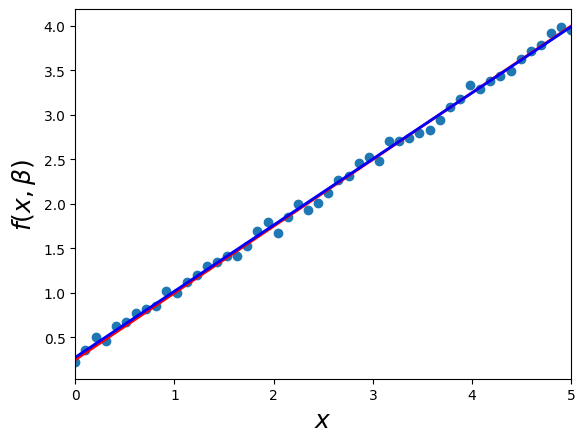

In [71]:
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.26707157 0.74458595 0.50082109]
0.00014999485699422374
0.12508000778210865


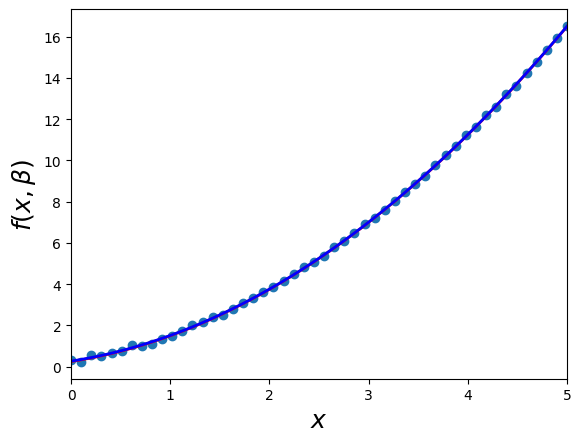

In [75]:
#решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b - (0.25, 0.75, 0.5) 
beta = (0.25, 0.75, 0.5) 
def f(x, b0, b1, b2): 
    return b0 + b1 * x + b2 * x * x
# зададим массив точек хі 
xdata = np.linspace(0, 5, 50) 
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) 
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax. set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00856653 1.99576565]
6.849045593776702e-05
0.1583801692030275


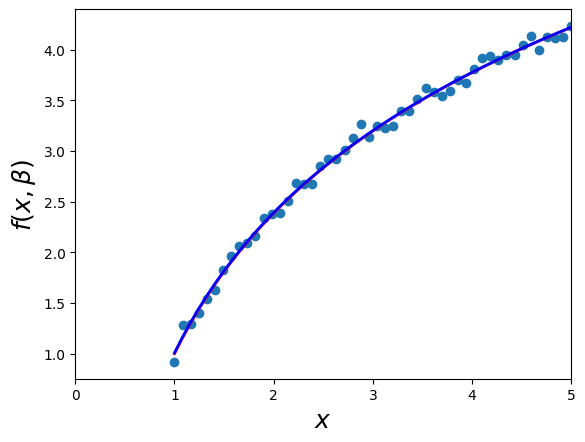

In [78]:
#решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек хі
xdata = np.linspace(1, 5, 50) 
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) 
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0]) 
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax. scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.99911181 2.0004093 ]
4.821524988904998e-06
0.11503596162139666


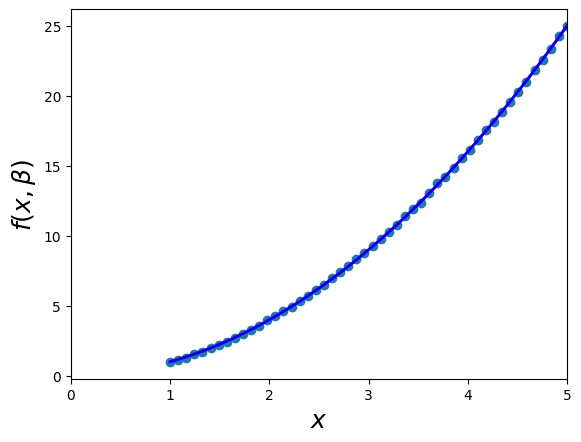

In [80]:
#решение #4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50) 
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) 
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2) 
print(fres)

fig, ax = plt.subplots()
ax. scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

2 задание 
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.


In [14]:
from scipy.optimize import curve_fit 
import scipy

In [15]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75) 
def f(x, be, b1):
    return be + b1*x
# зададим массив точек xі 
xdata=np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уі (без шума)
y=f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.26747822 0.74567678]
0.00022387449748534775
0.11879583294368024


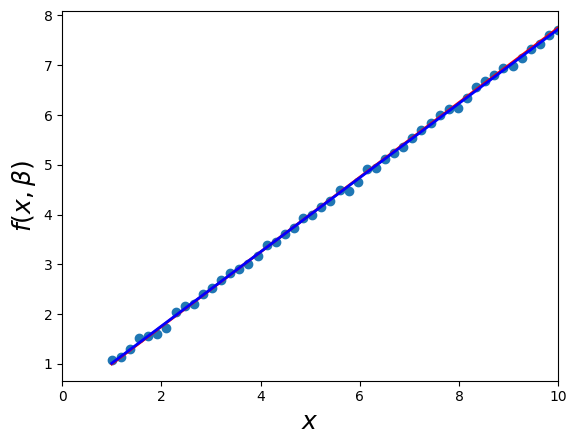

In [16]:
fig, ax = plt.subplots()
ax. scatter(xdata, ydata) 
ax. plot(xdata, y, 'r', lw=2) 
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.2093955  0.75554634 0.49990577]
0.0005417201571731866


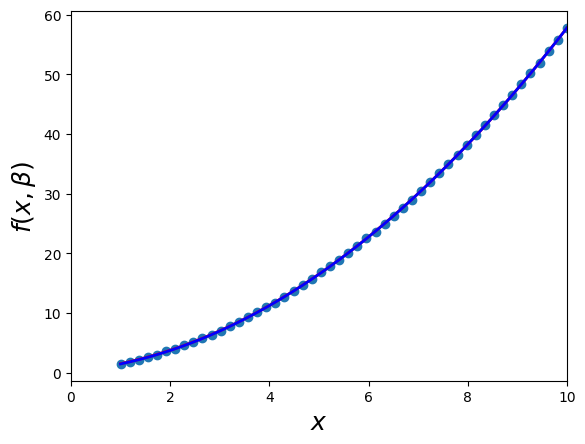

In [17]:
#решение #2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b - (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5) 
def f(x, be, b1, b2): 
    return be + b1 * x + b2 * x * x
# зададим массив точек xі
xdata = np.linspace(1, 10, 50) # создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres - sum(residuals**2) print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()

[0.98770789 2.01940555]
0.0001406776734905443


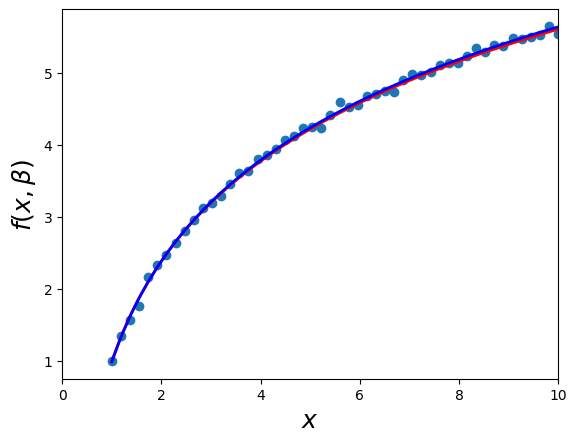

In [18]:
#решение #3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xі 
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) #Вычислим линейное отклонение
lin_dev = sum(beta_cov[0]) 
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres = sum(residuals**2) print(fres)
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

In [19]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, be, b1):
    return be * x ** b1
# зададим массив точек xі
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.00323411 1.99834736]
1.3848697880157325e-06
0.1256706285504681


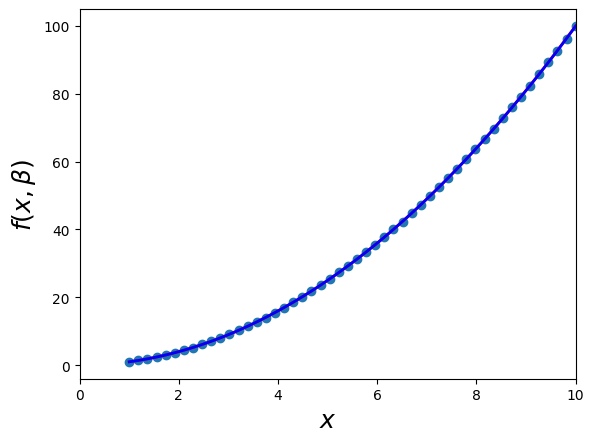

In [20]:
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

1.2.1 Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn


In [86]:
#Импортируем необходимые библиотеки #используем pandas и питpy для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

(20, 2)


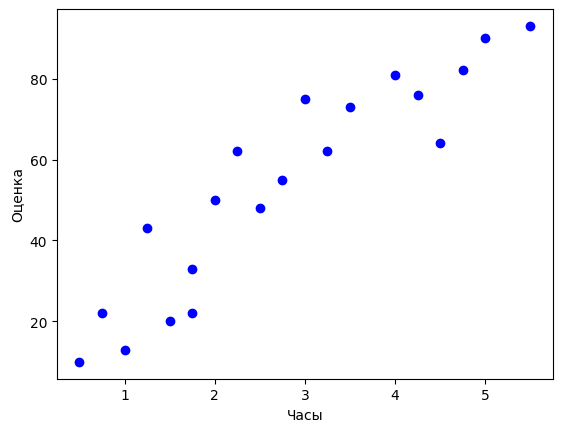

In [90]:
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
'Оценка' : [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

#Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму 
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена') 
plt.xlabel("Часы") 
plt.ylabel("Оценка")
plt.show()

In [96]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы. # Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии # необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


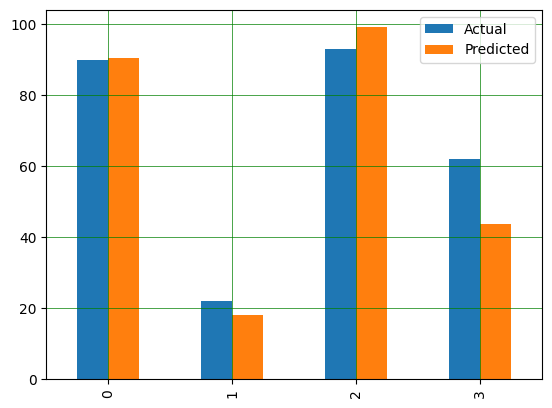

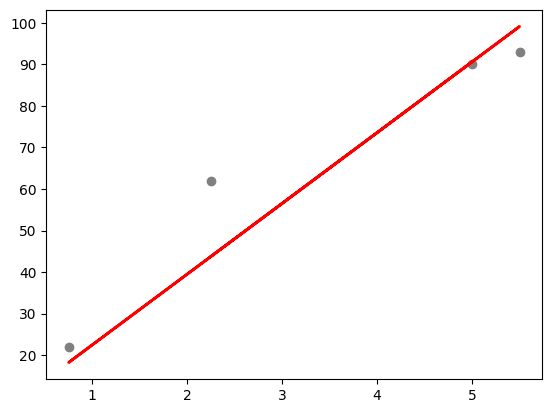

In [99]:
y_pred = regressor.predict(X_test) 
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df
# визуализируем результат сравнения в виде гистограммы 2 
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt. show()
#построим линию регрессии с тестовыми данными 
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.show()

3 задание 
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

(30, 2)


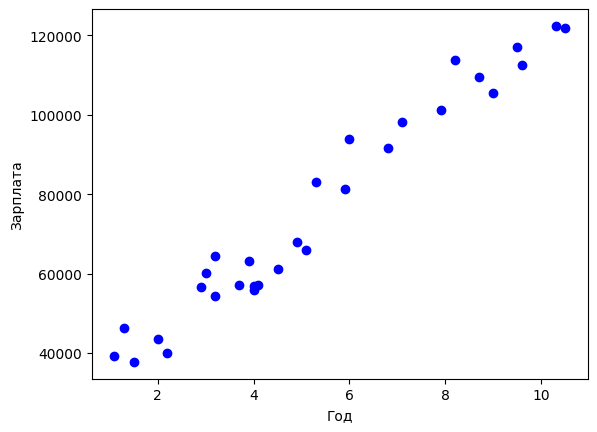

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


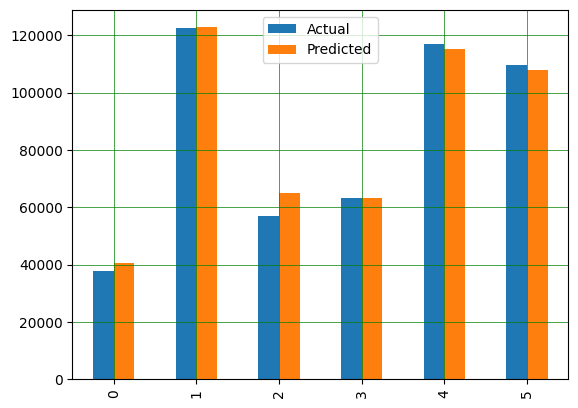

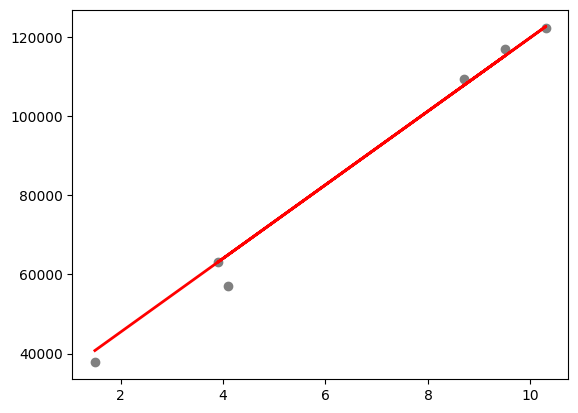

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Набор данных для описания взаимодействия Времени работы и зарплаты
my_dict = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")

#Исследуем набо данных
dataset = pd.DataFrame(my_dict)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Данные ЗП и количества лет" )
plt.xlabel("Год") 
plt.ylabel("Зарплата") 
plt.show()

X = my_dict.iloc[:, :-1].values
y = my_dict.iloc[:, 1].values
print(X)
print(y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.

# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# далее можно обучить алгоритм линейной регрессии # необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit() 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which="major", linestyle="-",linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#построим линию регрессии с тестовыми данными 
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

1.3.1 Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [100]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]] 
X = np.transpose(X) # transpose so input vectors 
X = np.c_[X, np.ones(X.shape[0])] # add bias term 
linreg = np.linalg.lstsq(X, y, rcond=None)[0] 
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


1.3.2 Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [112]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]] 
# формируем DataFrame из двух списков 
new_y = np.array(y)
new_y = new_y.transpose() 
df1 = pd.DataFrame(new_y)
new_X = np.array(X) 
new_X = new_X.transpose() 
df2 = pd.DataFrame(new_X) 
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2] 
dataset = pd.concat([df1, df2], axis=1, join="inner") 
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [133]:
# изучим данные
print(dataset.shape)
dataset.describe()
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код 
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df
#Последний шаг - оценить производительность алгоритча. Мы сделаем это, найдя значения для MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

(23, 4)
Mean Squared Error: 0.25608452276721205


4 задание 
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv


In [135]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataframe = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [141]:
x = dataframe.drop('quality',axis = 1)
y = dataframe['quality']

#формируем DataFrames из двух списков
new_y = np.array(y)
df1 = pd.DataFrame(new_y)

new_x = np.array(x)
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns = {0: 'y'}, inplace = False) 
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4',4: 'x5',5: 'x6', 6: 'x7', 7: 'x8', 8: 'x9',9: 'x10',10: 'x11'}, inplace = False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner") 
dataframe.head(1600)

print(dataframe.shape)
dataframe.describe()

# разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']] 
y = dataset['y']

# разделим данные на обучающую и тестовую выборки 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

#для обучения используем линейную регрессию
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

#выведем коэффициенты модели 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient']) 
print(coeff_df)

#Делаем прогнозы на тестовых данных 
y_pred = regressor.predict(x_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df)

#Оцениваем производительность алгоритма. MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))


(1599, 12)
     Coefficient
x1      0.035559
x2     -1.154577
x3     -0.329490
x4      0.019899
x5     -1.853738
x6      0.004765
x7     -0.003350
x8    -19.113372
x9     -0.428013
x10     0.936927
x11     0.279183
      Actual  Predicted
1508       6   5.917241
718        5   5.310312
1370       5   4.843599
579        6   5.701594
498        8   6.128786
...      ...        ...
317        6   5.379581
608        6   5.300969
843        5   4.879195
127        5   4.706353
1143       6   5.947842

[320 rows x 2 columns]
Mean Squared Error: 0.39390859087169117


5 задание *
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.



6 вариант 
x y
4,0 4,0
4,2 3,0
4,4 6,0
4,6 6,0
4,8 4,0
5,0 4,0

[4.  4.2 4.4 4.6 4.8 5. ]
[4. 3. 6. 6. 4. 4.]


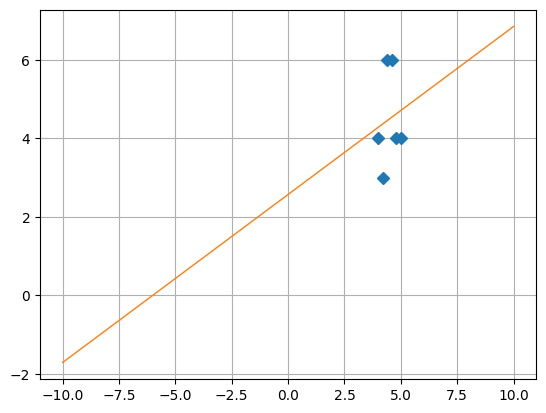

In [142]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
x = fromfile('x.txt', float, sep='\n')
y = fromfile('y.txt', float, sep='\n')
print(x)
print(y)
# Нахождение коэффициентов функции вида у = bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(6))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()

